# Determining What Salary should be offered to a new employee based on his PayScale

Let’s assume that the HR team of a company uses a table to determine what salary to offer to a new employee. For this project, let’s consider that an employee has applied for the role of a Regional Manager and has already worked as a Regional Manager for 2 years. So based on the table, he falls between level 6 and level 7 — Lets say he falls at level 6.5, We want to build a model to predict what salary we should offer this new employee.

## Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [93]:
data=pd.read_csv('Position_Salaries.csv')

In [94]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [95]:
data.rename(columns={'Level':'BPS'},inplace=True)

In [96]:
x=data.drop(['Position','Salary'],axis=1)
y=data.drop(['BPS','Position'],axis=1)


In [97]:
x

,BPS
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [98]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


##  Fit Linear Regression model to dataset
First, We will build a simple Linear Regression model to see what prediction it makes and then compare it to the prediction made by the Polynomial Regression to see which is more accurate.
We will be using the LinearRegression class from the library sklearn.linear_model. We create an object of the LinearRegression class and call the fit method passing the X and y.

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
reg=LinearRegression()

In [101]:
reg.fit(x,y)

LinearRegression()

## Visualize Linear Regression Results


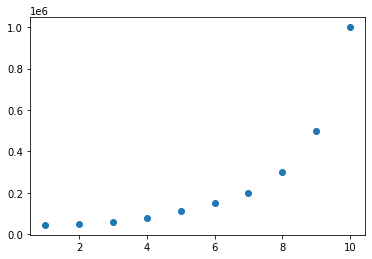

In [102]:
plt.scatter(x,y)

Text(0, 0.5, 'Salary')

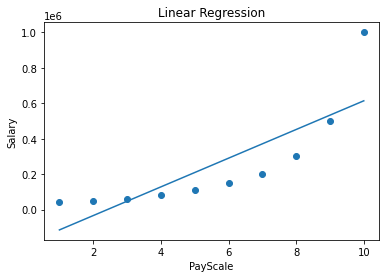

In [103]:

plt.scatter(x,y)
plt.plot(x,reg.predict(x))
plt.title("Linear Regression")
plt.xlabel("PayScale")
plt.ylabel("Salary")



##  Predict Linear Regression Results

In [104]:
reg.predict([[6.5]])

array([[330378.78787879]])

Lets check the predictions by implementing Polynomial Regression

In [105]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
polyreg=PolynomialFeatures(degree=2)

In [107]:
xpoly=polyreg.fit_transform(x)

In [108]:
xpoly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

## Fitting Polynomial Regression

In [109]:
reg1=LinearRegression()

In [110]:
reg1.fit(xpoly,y)

LinearRegression()

## Visualize Poly Regression Results

Text(0, 0.5, 'Salary')

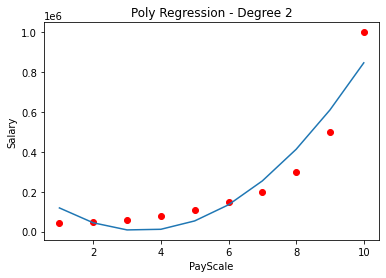

In [111]:
plt.scatter(x,y, color="red")
plt.plot(x,reg1.predict(polyreg.fit_transform(x)))
plt.title("Poly Regression - Degree 2")
plt.xlabel("PayScale")
plt.ylabel("Salary")

## Predict Polynomial Regression Results

In [112]:
reg1.predict(polyreg.fit_transform([[6.5]]))

array([[189498.10606061]])

## Change degree to 3

The predicted salary of a person at 6.5 Level is  [[133259.46969697]]


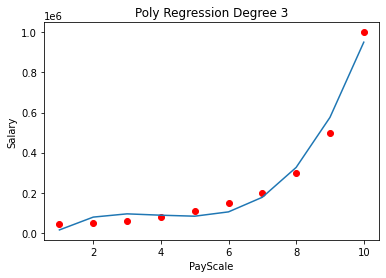

In [113]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)


plt.scatter(x,y, color="red")
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)))
plt.title("Poly Regression Degree 3")
plt.xlabel("PayScale")
plt.ylabel("Salary")

new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level is ',new_salary_pred)

## Change degree to 4 

The predicted salary of a person at 6.5 Level is  [[158862.4526516]]


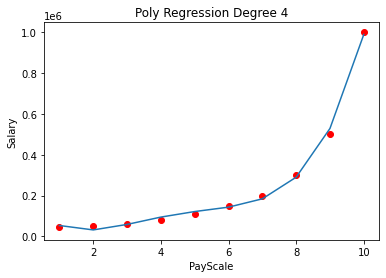

In [114]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

plt.scatter(x,y, color="red")
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)))
plt.title("Poly Regression Degree 4")
plt.xlabel("PayScale")
plt.ylabel("Salary")

new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print('The predicted salary of a person at 6.5 Level is ',new_salary_pred)

This Prediction is better than prediction using Linear Regression